In [1]:
import sqlite3
import json
import matplotlib.pyplot as plt

In [18]:
con = sqlite3.connect("error_corpus.db")
cur = con.cursor()

STOPWORDS = {"TenseAgreement", "NegativeForm"}

with open("groups.json") as f:
    groups = json.load(f)

In [3]:
tags = [el for el in cur.execute("SELECT tag, id FROM tag").fetchall() if not el[0] in STOPWORDS]

LEX: 51
GR: 170
Pron: 2
Syntax: 17
PRON: 17
OTHER: 1
Art: 0
Gr: 2


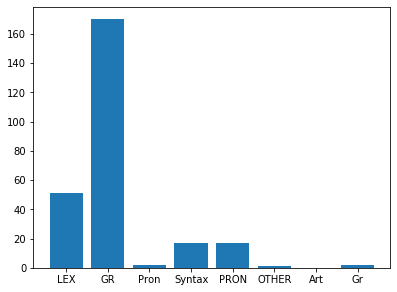

In [34]:

num_tags = []
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

for el in tags:
    res = cur.execute(
            f"SELECT count(DISTINCT ph.phrase) FROM phrase as ph WHERE ph.id in (SELECT e.phrase_id FROM error as e WHERE e.tag_id = (SELECT t.id FROM tag as t WHERE t.tag = ?)) ;",
            (el[0],),
    )
    num_tags.append(res.fetchone()[0])

for t, num in zip(tags, num_tags):
    print(f"{t[0]}: {num}")

fig, ax = plt.subplots()
ax.bar([el[0] for el in tags], num_tags)

plt.show()

In [31]:
tag = cur.execute("SELECT tag, id FROM tag WHERE tag = 'GR';").fetchone()

types = [el for el in cur.execute("SELECT error_type, id FROM type WHERE tag_id = ?", (tag[1],)).fetchall()]

ts = []
nums = []

for t, j in types:
    num = cur.execute("SELECT count(DISTINCT ph.phrase) FROM phrase as ph WHERE id in (SELECT e.phrase_id FROM error as e WHERE type_id = ?)", (j,)).fetchone()[0]
    ts.append(t)
    nums.append(num)

print(tag[0] + ": ")
for t, num in zip(ts, nums):
    print(f"{t:20}|" + "#" * num)

GR: 
Art                 |#################################
NaAt                |#
Prep                |#############################
RelCl               |##
PasV                |#
QuestStr            |#
Tense               |############################
SentStr             |##
Passive Voice       |##
Word order          |#########
Verb pattern        |###
Singular\plural noun|#
Passive voice       |#
Sequence of tenses  |####
Modal verb          |##
Complex Object      |##
Infinitive          |#####
Wrong pronoun       |###########
Noun countability   |##
Auxiliary           |####
Determiner          |#
IndefArt            |#######
Extra Preposition   |#
DefArt              |####
ZeroArt             |####
WrongPronoun        |##
Quantifier          |#
Gerund              |#
Tenses              |
Noun                |
Pronoun             |
Extra prep          |#
PresentPerf         |#
PresentPerfCont     |##
Missing Preposition |#
PastSimple          |#######
WrongPreposition    |#
Miss

In [33]:
other = cur.execute("SELECT phrase FROM phrase WHERE id = (SELECT phrase_id FROM error WHERE tag_id = (SELECT id FROM tag WHERE tag = 'OTHER'));")

print(other.fetchone()[0])

<Speaking of the results of our research. What we have>


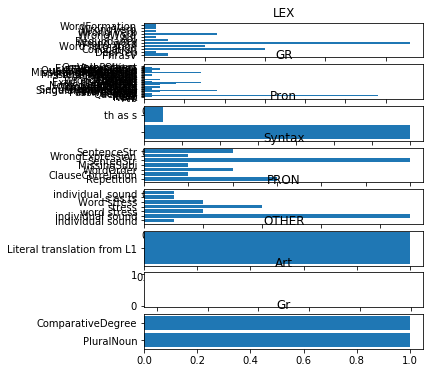

In [27]:
new_tags = [el for el in tags if not el[0] in groups["Pronunciation mistakes"] or not el[0] in ["GR"]]
fig, ax = plt.subplots(len(new_tags), 1)

plt.rcParams["figure.figsize"] = [5, 6]

for i, tag in enumerate(new_tags):
    ax[i].set_title(tag[0])
    types = [el for el in cur.execute("SELECT error_type, id FROM type WHERE tag_id = ?", (tag[1],)).fetchall()]

    ts = []
    nums = []

    for t, j in types:
        num = cur.execute("SELECT count(DISTINCT ph.phrase) FROM phrase as ph WHERE id in (SELECT e.phrase_id FROM error as e WHERE type_id = ?)", (j,)).fetchone()[0]
        ts.append(t)
        nums.append(num)

    ax[i].barh(ts, nums)
    


plt.show()  
#plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]  

[('', 8), ('th as s', 15), ('Individual sound', 20), ('individual sound', 29), ('word stress', 30), ('stress', 36), ('Word stress', 39), ('s as ts', 60), ('individual_sound', 83)]


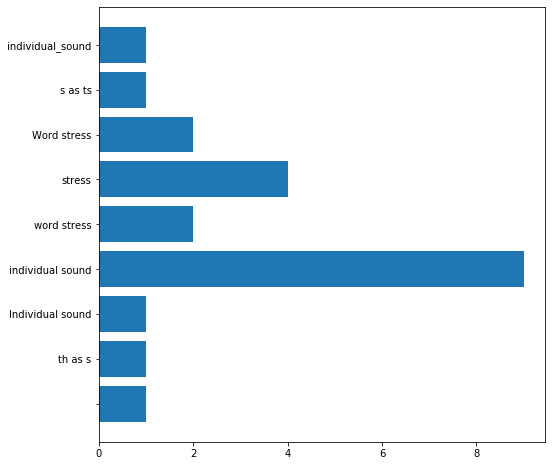

In [5]:
plt.rcParams["figure.figsize"] = [8, 8]

pron_tags = [el for el in tags if el[0] in groups["Pronunciation mistakes"]]

types = []

fig, ax = plt.subplots()

for i, tag in enumerate(pron_tags):

    types += [el for el in cur.execute("SELECT error_type, id FROM type WHERE tag_id = ?", (tag[1],)).fetchall()]

ts = []
nums = []

for t, j in types:
    num = cur.execute('SELECT count(DISTINCT ph.phrase) FROM phrase as ph WHERE id in (SELECT e.phrase_id FROM error as e WHERE e.type_id = ? AND e.tag_id in (SELECT id FROM tag WHERE tag in ("PRON", "Pron")));', (j,)).fetchone()[0]
    ts.append(t)
    nums.append(num)

ax.barh(ts, nums)


plt.show()

In [23]:
types = tuple([el[0] for el in cur.execute("SELECT id FROM type WHERE error_type LIKE 'individual%sound';")])

coms = cur.execute("SELECT comment, count(comment) FROM error WHERE type_id in (" + ("?," * len(types))[:-1] + ") GROUP BY comment;", (*types,)).fetchall()
for com, num in coms:
    ph = [el[0] for el in cur.execute("SELECT phrase FROM phrase WHERE id in (SELECT phrase_id FROM error WHERE comment = ?)", (com,)).fetchall()]
    print(f"{com}: {num}:", *ph)

 as k: 1: <knowledges>
c an ts: 1: <process>
c as sh: 1: <my specialties>
ch as h: 1: <tech>
draiven: 1: <data-driven>
extra i in lt: 1: <my specialties>
i as ai: 1: <quit>
th as f: 9: <with> <with> <with> <the> <think> <with> <think> <with> <think>
th as s: 1: <this>


In [16]:
con.close()
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]